In [ ]:
!pip install wordcloud
!pip install textblob

In [ ]:
import kagglehub
import os
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob


In [2]:
path = kagglehub.dataset_download("entenam/reddit-mental-health-dataset")

print("Path to dataset files:", path)

100%|██████████| 617M/617M [00:05<00:00, 112MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1


In [17]:
dataset_path = "/root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1/Original Reddit Data"
print(os.listdir(dataset_path))

['raw data', 'Labelled Data']


In [18]:
dataset_path = "/root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1/Original Reddit Data"

# files inside "raw data"
raw_data_path = os.path.join(dataset_path, "raw data")
print("Files in raw data:", os.listdir(raw_data_path))

# iles inside "Labelled Data"
labelled_data_path = os.path.join(dataset_path, "Labelled Data")
print("Files in Labelled Data:", os.listdir(labelled_data_path))

Files in raw data: ['2019', '2020', '2022', '2021']
Files in Labelled Data: ['LD DA 1.csv', 'LD TS 1.csv', 'Meta Labelled data kaggel.rtf', 'LD EL1.csv', 'LD PF1.csv']


In [4]:
# an example CSV file
file_path = "/root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1/Original Reddit Data/raw data/2019/Aug/depjaug19.csv"
df = pd.read_csv(file_path)
df.head()


,Unnamed: 0,author,created_utc,score,selftext,subreddit,title,timestamp
0,0,lonewolf_08,1567259900,1,Lately I feel like my partner doesn’t love me ...,depression,Depression messing with relationship?,2019-08-31 23:58:20
1,1,Thewriterswithin,1567259883,1,"In this dream I couldn't acompish any goals, I...",depression,Had a horrible nightmare about being depressed,2019-08-31 23:58:03
2,2,nespress,1567259622,1,there no point to anything everything eventual...,depression,i dont think anything can convince me to want ...,2019-08-31 23:53:42
3,3,nespress,1567259515,1,there no point to anything everything eventual...,depression,i dont think anything can convince me to want ...,2019-08-31 23:51:55
4,4,nespress,1567259466,1,there no point to anything everything eventual...,depression,i dont think anything can convince me to want ...,2019-08-31 23:51:06


In [3]:
# Base directory of the dataset
base_dir = "/root/.cache/kagglehub/datasets/entenam/reddit-mental-health-dataset/versions/1/Original Reddit Data/raw data/"

# List to store all dataframes
dfs = []

# Loop through all years and months
for year in ['2019', '2020', '2021', '2022']:
    year_path = os.path.join(base_dir, year)

    if os.path.exists(year_path):  # Check if the year folder exists
        for month in os.listdir(year_path):  # Iterate through months
            month_path = os.path.join(year_path, month)

            if os.path.isdir(month_path):  # Check if it's a directory
                for file in os.listdir(month_path):  # Iterate through CSV files
                    if file.endswith(".csv"):
                        file_path = os.path.join(month_path, file)
                        temp_df = pd.read_csv(file_path)
                        dfs.append(temp_df)

# Combine all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

# basic info
print(f"Dataset contains {len(df)} posts from 2019 to 2022.")
df.head()


Dataset contains 1851580 posts from 2019 to 2022.


,Unnamed: 0,author,created_utc,score,selftext,subreddit,title,timestamp
0,0,throwaroundsparkles,1551358537,21,Anxiety surrounding this is affecting my Reddi...,Anxiety,Does anyone else experience anxiety about bein...,2019-02-28 23:55:37
1,1,n8toxic21,1551358315,27,"It’s like before I even open my eyes, I’m in a...",Anxiety,Anyone else deal with morning anxiety?,2019-02-28 23:51:55
2,2,met253,1551357517,2,Does anyone else ever experience this? The bes...,Anxiety,Anxiety Hangover,2019-02-28 23:38:37
3,3,Guayabalosa838,1551357342,2,Do you think paranoia can be linked to anxiety...,Anxiety,Paranoia,2019-02-28 23:35:42
4,4,keyholepossums,1551356091,2,"I have sleepless nights, my heart rate is goin...",Anxiety,I don’t know what the - is happening,2019-02-28 23:14:51


In [4]:
df.shape

(1851580, 8)

In [6]:
# Download
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""

    # Removes URLs
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Removes special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converts to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Removes stopwords & Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

# preprocessing
df['clean_text'] = df['selftext'].apply(preprocess_text)

# View cleaned text
df[['selftext', 'clean_text']].head()


,selftext,clean_text
0,Anxiety surrounding this is affecting my Reddi...,anxiety surrounding affecting reddit behaviour...
1,"It’s like before I even open my eyes, I’m in a...",like even open eye im semipanicidk stressful d...
2,Does anyone else ever experience this? The bes...,anyone else ever experience best way describe ...
3,Do you think paranoia can be linked to anxiety...,think paranoia linked anxiety constantly feel ...
4,"I have sleepless nights, my heart rate is goin...",sleepless night heart rate going high constant...


In [16]:
df.head()

,Unnamed: 0,author,created_utc,score,selftext,subreddit,title,timestamp,clean_text,sentiment,year,month,year_month
0,0,throwaroundsparkles,1551358537,21,Anxiety surrounding this is affecting my Reddi...,Anxiety,Does anyone else experience anxiety about bein...,2019-02-28 23:55:37,anxiety surrounding affecting reddit behaviour...,Positive,2019,2,2019-02
1,1,n8toxic21,1551358315,27,"It’s like before I even open my eyes, I’m in a...",Anxiety,Anyone else deal with morning anxiety?,2019-02-28 23:51:55,like even open eye im semipanicidk stressful d...,Positive,2019,2,2019-02
2,2,met253,1551357517,2,Does anyone else ever experience this? The bes...,Anxiety,Anxiety Hangover,2019-02-28 23:38:37,anyone else ever experience best way describe ...,Positive,2019,2,2019-02
3,3,Guayabalosa838,1551357342,2,Do you think paranoia can be linked to anxiety...,Anxiety,Paranoia,2019-02-28 23:35:42,think paranoia linked anxiety constantly feel ...,Negative,2019,2,2019-02
4,4,keyholepossums,1551356091,2,"I have sleepless nights, my heart rate is goin...",Anxiety,I don’t know what the - is happening,2019-02-28 23:14:51,sleepless night heart rate going high constant...,Positive,2019,2,2019-02


In [17]:
# Saving the data in file
# df.to_csv('/content/sample_data/data.csv', index=False)

a. Data Loading

In [1]:
df = pd.read_csv('/content/drive/MyDrive/Mental_health/data.csv')


### Data Exploration & Visualization

1. Word Cloud (Most Frequent Words)

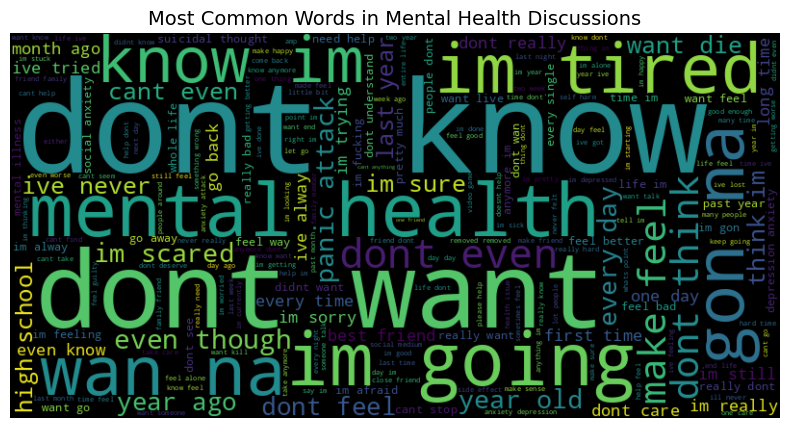

In [3]:
# Combine all text data into one large string
text_data = " ".join(df['clean_text'].dropna())

# word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_data)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Mental Health Discussions", fontsize=14)
plt.show()


2. Sentiment Analysis Distribution

<ipython-input-5-5a20c175f3f5>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette=["red", "blue", "green"])


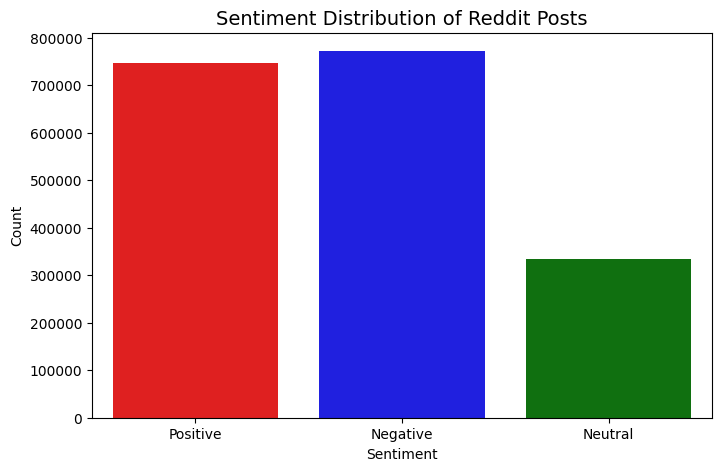

In [5]:
def get_sentiment(text):
    if pd.isnull(text) or text.strip() == "":
        return "Neutral"

    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity

    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

# sentiment analysis
df['sentiment'] = df['clean_text'].apply(get_sentiment)

# Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette=["red", "blue", "green"])
plt.title("Sentiment Distribution of Reddit Posts", fontsize=14)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


3. Sentiment Trends Over Time

In [6]:
# Converting 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extracting Year and Month
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['year_month'] = df['timestamp'].dt.to_period('M')  # Format YYYY-MM


In [7]:
# Group by Year-Month and Sentiment
sentiment_trends = df.groupby(['year_month', 'sentiment']).size().unstack()

# Fill missing values with 0 (if some months don't have a particular sentiment)
sentiment_trends = sentiment_trends.fillna(0)


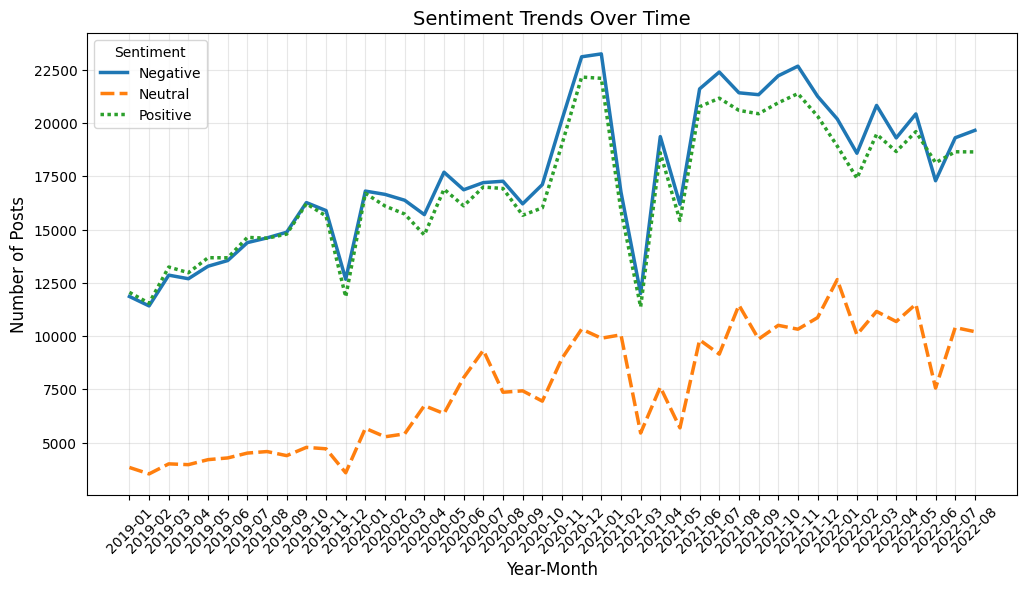

In [8]:
# Convert 'year_month' to string before plotting
sentiment_trends.index = sentiment_trends.index.astype(str)

# Plot sentiment trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, linewidth=2.5)

# Labels and Title
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)
plt.title("Sentiment Trends Over Time", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.grid(alpha=0.3)

# Show plot
plt.show()


4. Sentiment Trends Over Time

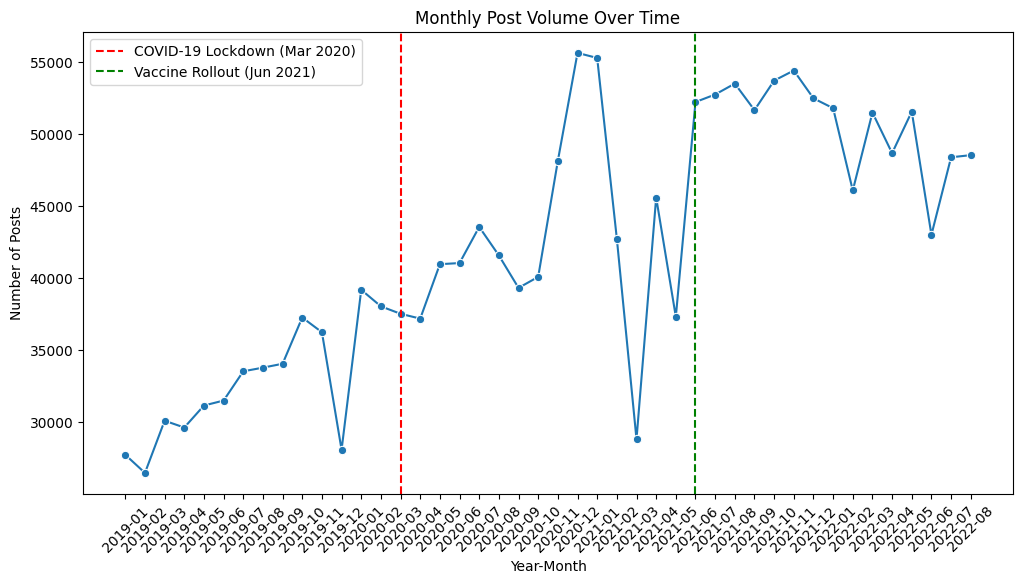

In [15]:
# Converting 'timestamp' to datetime format and drop invalid entries
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])

# Creating a 'year_month' column
df['year_month'] = df['timestamp'].dt.to_period('M')

# Aggregating the total number of posts per month
monthly_counts = df.groupby('year_month').size().reset_index(name='post_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts['year_month'].astype(str), y=monthly_counts['post_count'], marker='o')
plt.xlabel("Year-Month")
plt.ylabel("Number of Posts")
plt.title("Monthly Post Volume Over Time")
plt.xticks(rotation=45)

# Marking key pandemic-related events
plt.axvline(x='2020-03', color='red', linestyle='--', label='COVID-19 Lockdown (Mar 2020)')
plt.axvline(x='2021-06', color='green', linestyle='--', label='Vaccine Rollout (Jun 2021)')
plt.legend()
plt.show()


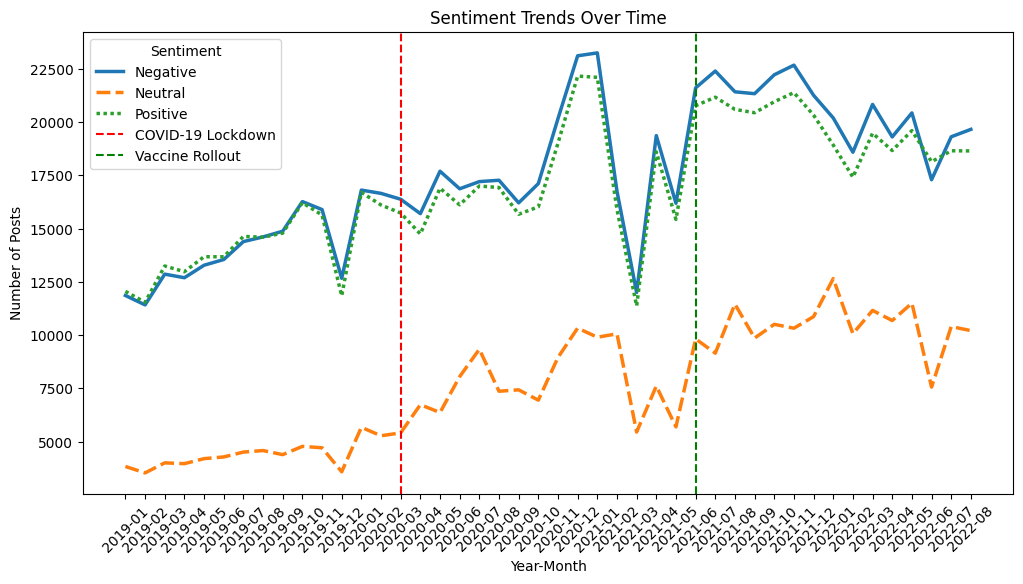

In [17]:
# Group by year_month and sentiment, then unstack for easier plotting
sentiment_trends = df.groupby(['year_month', 'sentiment']).size().unstack().fillna(0)

# Converting 'year_month' index to string before plotting
sentiment_trends.index = sentiment_trends.index.astype(str)

# Ploting sentiment trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_trends, linewidth=2.5)

plt.xlabel("Year-Month")
plt.ylabel("Number of Posts")
plt.title("Sentiment Trends Over Time")
plt.xticks(rotation=45)

# Marking pandemic-related events
plt.axvline(x='2020-03', color='red', linestyle='--', label='COVID-19 Lockdown')
plt.axvline(x='2021-06', color='green', linestyle='--', label='Vaccine Rollout')
plt.legend(title="Sentiment")
plt.show()


5. Word Usage pre and pandemic period with Average Sentiment Polarity
- Visual insights from the word clouds, and
- Quantitative sentiment comparisons between the two periods

In [10]:
# Ensuring timestamp is in datetime format and drop invalid entries
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df = df.dropna(subset=['timestamp'])

# Creating subsets for pre-pandemic and pandemic periods
df_pre = df[df['timestamp'] < '2020-03-01']
df_pandemic = df[df['timestamp'] >= '2020-03-01']

print("Pre-pandemic posts:", len(df_pre))
print("Pandemic period posts:", len(df_pandemic))


Pre-pandemic posts: 456965
Pandemic period posts: 1394615


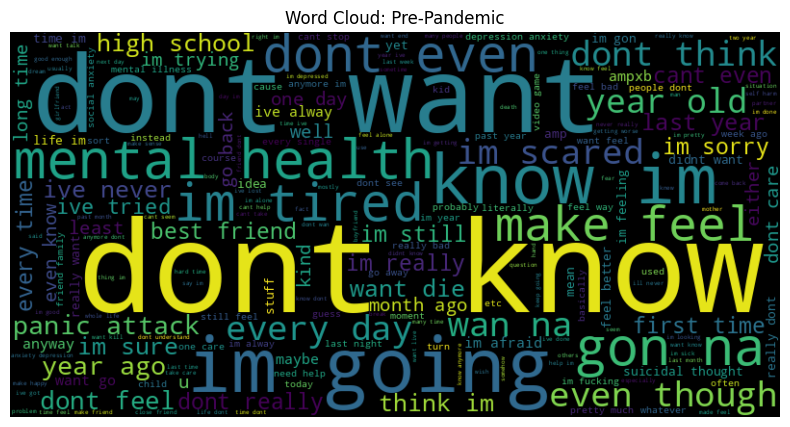

In [11]:
# Combining text for pre-pandemic
text_pre = " ".join(df_pre['clean_text'].dropna())

wordcloud_pre = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_pre)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pre, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Pre-Pandemic")
plt.show()


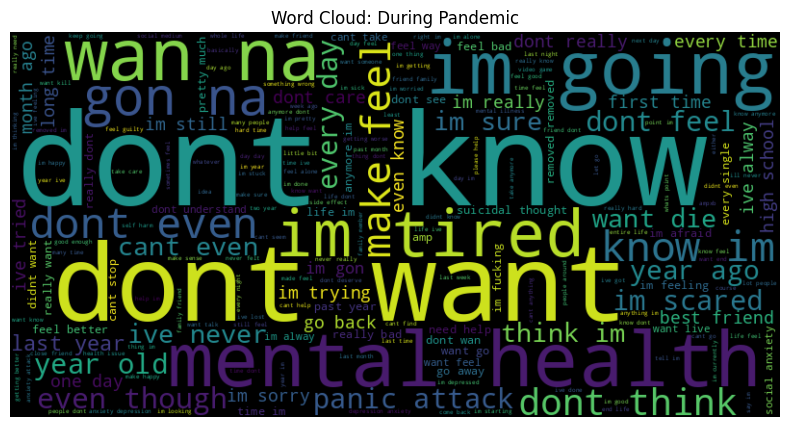

In [12]:
# Combining text for pandemic period
text_pandemic = " ".join(df_pandemic['clean_text'].dropna())

wordcloud_pandemic = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text_pandemic)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pandemic, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: During Pandemic")
plt.show()


In [13]:
def get_sentiment_polarity(text):
    if pd.isnull(text) or text.strip() == "":
        return 0.0
    return TextBlob(text).sentiment.polarity

# Computing sentiment polarity for each period
df_pre['polarity'] = df_pre['clean_text'].apply(get_sentiment_polarity)
df_pandemic['polarity'] = df_pandemic['clean_text'].apply(get_sentiment_polarity)

# Calculating average polarity
avg_polarity_pre = df_pre['polarity'].mean()
avg_polarity_pandemic = df_pandemic['polarity'].mean()

print("Average Sentiment Polarity (Pre-Pandemic):", avg_polarity_pre)
print("Average Sentiment Polarity (During Pandemic):", avg_polarity_pandemic)


<ipython-input-13-edd1fc3044a2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['polarity'] = df_pre['clean_text'].apply(get_sentiment_polarity)


Average Sentiment Polarity (Pre-Pandemic): -0.007516283418738996
Average Sentiment Polarity (During Pandemic): -0.01040886775110604


<ipython-input-13-edd1fc3044a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pandemic['polarity'] = df_pandemic['clean_text'].apply(get_sentiment_polarity)


Polarity is a float within the range [-1.0, 1.0], where negative values indicate negative sentiment and positive values indicate positive sentiment.

In [14]:
print("Average Sentiment Polarity (Pre-Pandemic):", avg_polarity_pre)
print("Average Sentiment Polarity (During Pandemic):", avg_polarity_pandemic)

Average Sentiment Polarity (Pre-Pandemic): -0.007516283418738996
Average Sentiment Polarity (During Pandemic): -0.01040886775110604
